# Predicting Car Prices

Let's predict a car's market price based on the dataset published by UC Irvine Machine Learning. In this project, we'll be determining the car's market price using k-nearest neigbors algorithm. For more information on the dataset click [here](https://archive.ics.uci.edu/ml/datasets/automobile).

In [1]:
import numpy as np
import pandas as pd

pd.options.display.max_columns = 99

data_frame = pd.read_csv('imports-85.data')
data_frame.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


It looks like the dataset does not have column names. We'll have to add the column names manually by refering the documentation [here](https://archive.ics.uci.edu/ml/datasets/automobile).

In [2]:
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

data_frame = pd.read_csv("imports-85.data", names=cols)
data_frame.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
# Select only the columns with continuous values
continuous_values_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
numeric_cars = data_frame[continuous_values_cols]

numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
numeric_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
normalized-losses    205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-size          205 non-null int64
bore                 205 non-null object
stroke               205 non-null object
compression-rate     205 non-null float64
horsepower           205 non-null object
peak-rpm             205 non-null object
city-mpg             205 non-null int64
highway-mpg          205 non-null int64
price                205 non-null object
dtypes: float64(5), int64(4), object(6)
memory usage: 24.1+ KB


## Data cleaning & Feature Engineering

It's necessary to either impute or remove the rows or columns with missing or incorrect values. Based on the observation the normalized-losses column contains missing values represented using "?". Let's replace the string value '?' with NaN.

In [5]:
#Replacing '?' with NaN
numeric_cars = numeric_cars.replace('?', np.nan)
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


In [6]:
numeric_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
normalized-losses    164 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-size          205 non-null int64
bore                 201 non-null object
stroke               201 non-null object
compression-rate     205 non-null float64
horsepower           203 non-null object
peak-rpm             203 non-null object
city-mpg             205 non-null int64
highway-mpg          205 non-null int64
price                201 non-null object
dtypes: float64(5), int64(4), object(6)
memory usage: 24.1+ KB


Since most of the continous variable columns are of object type, let's cast it to float type.

In [7]:
numeric_cars = numeric_cars.astype('float')
numeric_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [8]:
numeric_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
normalized-losses    164 non-null float64
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null float64
engine-size          205 non-null float64
bore                 201 non-null float64
stroke               201 non-null float64
compression-rate     205 non-null float64
horsepower           203 non-null float64
peak-rpm             203 non-null float64
city-mpg             205 non-null float64
highway-mpg          205 non-null float64
price                201 non-null float64
dtypes: float64(15)
memory usage: 24.1 KB


Since 'price' column is our target column, let's drop the rows with missing values.

In [9]:
numeric_cars.dropna(subset=['price'], inplace=True)
numeric_cars.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [10]:
# Replace the missing values in other columns using the respective column mean.
numeric_cars.fillna(numeric_cars.mean(), inplace = True)
numeric_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [11]:
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,122.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,122.0,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


However, each column have different scaling. For example, if we take row 2, and row 3. The peak RPM has a difference of 500, while the difference in width is 0.7. The algorithm will give extra weightage towards the difference in peak RPM.That is why it is important to normalize the dataset. After normalization we'll have values ranging from -1 to 1.

In [12]:
# Normalize all columnns to range from 0 to 1 except the target column.
normalized_cars  = (numeric_cars - numeric_cars.min()) / (numeric_cars.max()-numeric_cars.min())
normalized_cars['price'] = numeric_cars['price']
normalized_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


## Univariate Model

Initially let's use a univariate model, were we'll train our model with a single feature and for each feature the error is measured. Let the k value be default. 

In [13]:
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

def knn_train_test(feature_col, target_col, df):
    
    np.random.seed(1)
    # Randomize the order of rows in data frame.
    shuffled_index  = np.random.permutation(df.index)
    shuffled_df = df.reindex(shuffled_index)
    
    # Divide the number of rows by half and cast it to integer.
    half = int(len(df)/2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = shuffled_df.iloc[:half]
    test_df = shuffled_df.iloc[half:]
    
    model = KNeighborsRegressor()
    model.fit(train_df[[feature_col]], train_df[target_col])
        
    #Making prediction using the model
    predicted_labels  = model.predict(test_df[[feature_col]])
        
    #Evaluating the performance
    mse = mean_squared_error(test_df['price'], predicted_labels)
    #Root mean square error
    rmse = np.sqrt(mse)
    return rmse

# For each column (minus `price`), train a model, return RMSE value
# and add to the dictionary `rmse_results`
rmse_results = {}

feature_cols = normalized_cars.columns[:-1]
for column in feature_cols:
    rmse_val = knn_train_test(column, 'price', normalized_cars)
    rmse_results[column] = rmse_val
    
# Create a Series object from the dictionary so 
# we can easily view the results, sort, etc
rmse_results_series = pd.Series(rmse_results)
rmse_results_series.sort_values()

engine-size          3238.462830
horsepower           4037.037713
curb-weight          4401.118255
highway-mpg          4630.026799
width                4704.482590
city-mpg             4766.422505
length               5427.200961
wheel-base           5461.553998
compression-rate     6610.812153
bore                 6780.627785
normalized-losses    7330.197653
peak-rpm             7697.459696
stroke               8006.529545
height               8144.441043
dtype: float64

It look's like the 'engine-size' column has the least amount of error.

But first, let's modify the function to include k value as a parameter. Then we can loop through a list of k values and features to determine which k value and features are most optimal in our machine learning model.

In [14]:
def knn_train_test(feature_col, target_col, df):
    
    # Randomize order of rows in data frame.
    np.random.seed(1)
    shuffled_index  = np.random.permutation(df.index)
    shuffled_df = df.reindex(shuffled_index)
    
    # Divide number of rows in half and round.
    half = int(len(df)/2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = shuffled_df.iloc[:half]
    test_df = shuffled_df.iloc[half:]
    
    k_values = [1,3,5,7,9]
    k_rmses = {}
        
    
    for k in k_values:
        #Fitting the model
        model = KNeighborsRegressor(n_neighbors=k)
        model.fit(train_df[[feature_col]], train_df[target_col])
        
        #Making prediction using the model
        predicted_labels  = model.predict(test_df[[feature_col]])
        
        #Evaluating the performance
        mse = mean_squared_error(test_df['price'], predicted_labels)
        rmse = np.sqrt(mse)
        k_rmses[k] = rmse
    return k_rmses

# For each column (minus `price`), train a model, return RMSE value
# and add to the dictionary `rmse_results`
k_rmse_results = {}

feature_cols = normalized_cars.columns[:-1]
for column in feature_cols:
    rmse_val = knn_train_test(column, 'price', normalized_cars)
    k_rmse_results[column] = rmse_val
    
k_rmse_results

{'normalized-losses': {1: 7846.750605148984,
  3: 7500.5698123109905,
  5: 7330.197653434445,
  7: 7756.421586234123,
  9: 7688.096096891432},
 'wheel-base': {1: 4493.734068810494,
  3: 5120.161506064513,
  5: 5461.553997873057,
  7: 5448.1070513823315,
  9: 5738.405685192312},
 'length': {1: 4628.45550121557,
  3: 5129.8358210721635,
  5: 5427.2009608367125,
  7: 5313.427720847974,
  9: 5383.054514833446},
 'width': {1: 4559.257297950061,
  3: 4606.413692169901,
  5: 4704.482589704386,
  7: 4571.485046194653,
  9: 4652.914172067787},
 'height': {1: 8904.04645636071,
  3: 8277.609643045525,
  5: 8144.441042663747,
  7: 7679.598124393773,
  9: 7811.03606291223},
 'curb-weight': {1: 5264.290230758878,
  3: 5022.318011757233,
  5: 4401.118254793124,
  7: 4330.608104418053,
  9: 4632.044474454401},
 'engine-size': {1: 3258.4861059962027,
  3: 2840.562805643501,
  5: 3238.4628296477176,
  7: 3563.086774256415,
  9: 3831.8244149840766},
 'bore': {1: 8602.58848450066,
  3: 6984.239489480916,


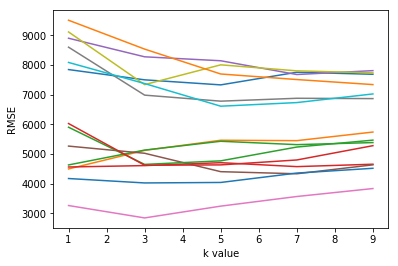

In [15]:
from collections import OrderedDict

for k, v in k_rmse_results.items():  
    # type(k) - str
    #type(v) - dictionary
    v_sorted = OrderedDict(sorted(v.items()))
    
    x = list(v_sorted.keys())
    y = list(v_sorted.values())
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

## Multivariate

Let's calculate the mean error for each feature with different k values which has been calculated in the previous step. 

In [16]:
avg_rmse = {}
for k,v in k_rmse_results.items():
    #Calculation of mean
    avg_rmse[k] = np.mean(list(v.values()))

#Converting to series for sorting easily
avg_rmse_series = pd.Series(avg_rmse)
avg_rmse_series_sorted = avg_rmse_series.sort_values()
print(avg_rmse_series_sorted)

sorted_features = avg_rmse_series_sorted.index

engine-size          3346.484586
horsepower           4219.377860
width                4618.910560
curb-weight          4730.075815
highway-mpg          5069.469256
length               5176.394904
city-mpg             5202.409003
wheel-base           5252.392462
compression-rate     7166.073599
bore                 7222.472445
normalized-losses    7624.407151
stroke               8000.240467
peak-rpm             8119.365233
height               8163.346266
dtype: float64


Now we know which features have the lowest amount of error, so we can begin applying the function to multiple features at once.

In [17]:
def knn_train_test(feature_col, target_col, df):
    
    # Randomize order of rows in data frame.
    np.random.seed(1)
    shuffled_index  = np.random.permutation(df.index)
    shuffled_df = df.reindex(shuffled_index)
    
    # Divide number of rows in half and round.
    half = int(len(df)/2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = shuffled_df.iloc[:half]
    test_df = shuffled_df.iloc[half:]
    

    k_rmses = {}    
    

    #Fitting the model
    model = KNeighborsRegressor(n_neighbors=5)
    model.fit(train_df[feature_col], train_df[target_col])
        
    #Making prediction using the model
    predicted_labels  = model.predict(test_df[feature_col])
        
    #Evaluating the performance
    mse = mean_squared_error(test_df['price'], predicted_labels)
    rmse = np.sqrt(mse)
    return rmse


k_rmse_results = {}

for num_features in range(2,7):
    rmse_val = knn_train_test(sorted_features[:num_features], 'price', normalized_cars)
    k_rmse_results[str(num_features) + ' best features'] = rmse_val

#Sorting based on RMSE values
k_rmse_results_sorted = pd.Series(k_rmse_results).sort_values()
k_rmse_results_sorted

2 best features    2949.881728
5 best features    3410.217013
6 best features    3478.510890
4 best features    3487.340917
3 best features    3580.737665
dtype: float64

We have found the best features for the multivariate model based on the rmse error. Let's tune our model further by finding the optimal k value.

## Hyperparameter Tuning

In [18]:
def knn_train_test(feature_col, target_col, df):
    
    # Randomize order of rows in data frame.
    np.random.seed(1)
    shuffled_index  = np.random.permutation(df.index)
    shuffled_df = df.reindex(shuffled_index)
    
    # Divide number of rows in half and round.
    half = int(len(df)/2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = shuffled_df.iloc[:half]
    test_df = shuffled_df.iloc[half:]
    
    #k value ranging from 1 to 26
    k_values = [i for i in range(1,26)]  
    k_rmses = {}   
    
    for k in k_values: 
        #Fitting the model
        model = KNeighborsRegressor(n_neighbors=k)
        model.fit(train_df[feature_col], train_df[target_col])
        
        #Making prediction using the model
        predicted_labels  = model.predict(test_df[feature_col])
        
        #Evaluating the performance
        mse = mean_squared_error(test_df['price'], predicted_labels)
        rmse = np.sqrt(mse)
        k_rmses[k] = rmse
    return k_rmses
    

k_rmse_results = {}

top_features = k_rmse_results_sorted.index.tolist()
#Extracting the top 3 features
top_3_features = [int(i.split()[0]) for i in top_features[:3]]

for num_features in top_3_features:
    rmse_val = knn_train_test(sorted_features[:num_features], 'price', normalized_cars)
    k_rmse_results[str(num_features) + ' best features'] = rmse_val
    
k_rmse_results

{'2 best features': {1: 2783.6204237227344,
  2: 2657.7963807419765,
  3: 2792.586573031673,
  4: 2891.5329686923255,
  5: 2949.8817277180374,
  6: 3096.402601694776,
  7: 3164.681969020496,
  8: 3413.228359192009,
  9: 3748.6716603306486,
  10: 4080.7125057341937,
  11: 4215.6372280600335,
  12: 4275.421524277872,
  13: 4373.901683035496,
  14: 4424.285137239815,
  15: 4539.505493095937,
  16: 4667.307671446768,
  17: 4729.605305844226,
  18: 4790.556632159094,
  19: 4824.3866193292615,
  20: 4840.850914693829,
  21: 4837.429062000271,
  22: 4831.16988267597,
  23: 4861.679492959275,
  24: 4903.346008862579,
  25: 4955.892429427362},
 '5 best features': {1: 2824.7061233282866,
  2: 2915.6731645496975,
  3: 3012.4204546509704,
  4: 3202.8876051367483,
  5: 3410.2170133901805,
  6: 3618.4509432660384,
  7: 3622.6290209234803,
  8: 3848.635835654326,
  9: 3977.8149139381726,
  10: 3994.8132211260104,
  11: 4159.843526607947,
  12: 4294.3389473154875,
  13: 4380.848359486949,
  14: 4466.3

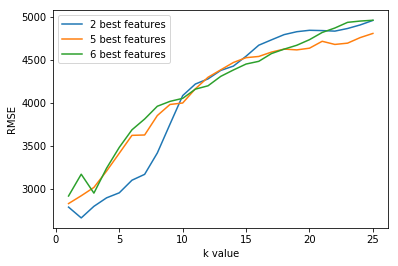

In [19]:
for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())  
    plt.plot(x,y, label = k)
    
plt.xlabel('k value')
plt.ylabel('RMSE')
plt.legend(loc = 'best')

From the chart above, we can see that choosing the best two features with a k value of 2 will give us the RMSE of 2657. So we can predict a car price in the future by selecting engine-size and horsepower features and setting the k value as 2.